In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from classify_grid import *
import os, ebf
from astropy.io import ascii
import time
#import mwdust

In [2]:
# load MIST models
homedir=os.path.expanduser('~/')
model=ebf.read(homedir+'science/models/MIST/mesa.ebf')

In [4]:
# prelims to manipulate some model variables (to be automated soon ...)
model['rho']=np.log10(model['rho'])
# next line turns off Dnu scaling relation corrections
model['fdnu'][:]=1.
model['avs']=np.zeros(len(model['teff']))
model['dis']=np.zeros(len(model['teff']))

In [5]:
# next 2 lines allow to use a reddening model (needs galactic coordinates)
#x.addcoords(338.3683920,-9.0227690)
#dustmodel = mwdust.Combined15()

In [6]:
# initilize class with observables
x=obsdata()

In [7]:
# add any combiantion of observables
# Teff, logg, FeH + uncertainties
x.addspec([5065.,-99.0,-0.1],[120.,0.0,0.2]) 
# numax & Dnu + uncertainties
x.addseismo([231.,16.5],[10.,0.5])
# photometry 
x.addjhk([6.025,5.578,5.496],[0.019,0.038,0.018])
# parallax
x.addplx(8.9536/1e3,0.7/1e3)

In [8]:
# run classification
paras=classify(input=x,model=model,dustmodel=0.,doplot=0)

teff 555904
dnu 13897
numax 8438
feh 6373
number of models used within non-phot obsconstraints: 6373
number of models incl reddening: 828490
number of models after phot constraints: 828198
----
teff 5035.37364818 81.120639045 81.120639045
logg 3.27740127438 0.016 0.016
feh -0.25 0.15 0.15
rad 4.55448438278 0.184337950611 0.184337950611
mass 1.42923048888 0.148268842169 0.148268842169
rho 0.0151510278714 0.00071404594506 0.000748388148029
lum 11.9209489039 1.45457575907 1.29639200986
age 2.5 1.0 0.75
avs -0.0275 0.29 0.19


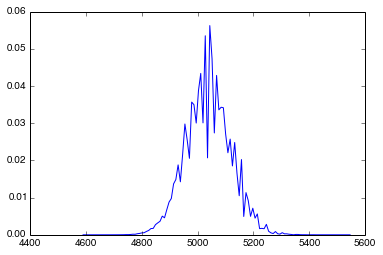

In [10]:
# plot teff posterior
plt.plot(paras.teffpx,paras.teffpy)

2.5 1.0 0.75


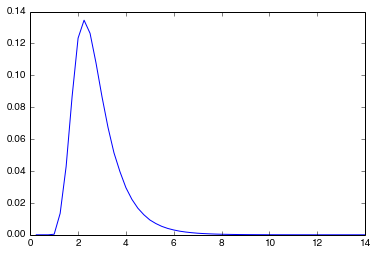

In [14]:
# print age median +/- 1 sigma, plot posterior
print paras.age,paras.ageep,paras.ageem
plt.plot(paras.agepx,paras.agepy)

1.42923048888 0.148268842169 0.148268842169


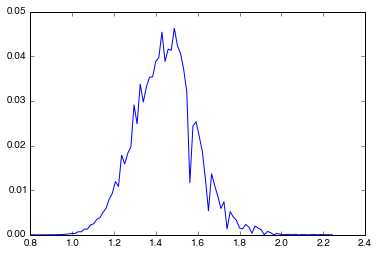

In [16]:
# print mass median +/- 1 sigma, plot posterior
print paras.mass,paras.massep,paras.massem
plt.plot(paras.masspx,paras.masspy)